# Naive Bayes classifier

This notebook loads feature generated data of the "515k Hotel reviews data set" from Kaggle (https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe) and applies different variations of Naive Bayes to it. 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load feature set
Please make sure to adjust the path of ```df = pd.read_pickle('path')``` to the path of the feature genereated set you want to apply Naive Bayes on.



In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def train_test_valid_split(df,upsampling=True):
    train,test = train_test_split(df,test_size=0.3,stratify=df["Reviewer_Score"], random_state=42)
    test,valid = train_test_split(test,test_size=0.5,stratify=test["Reviewer_Score"], random_state=42)
    #Zusammengefasst, folgende Aufteilung:
    #70% Training, 15% Validation, 15% Test


    unique, counts_train = np.unique(train["Reviewer_Score"], return_counts=True)
    if(upsampling): #Idee: reduce class 0 to the size of class 1, dupliate samples from class 2 to the size of class 1
        train_0 = train[train["Reviewer_Score"]==0].sample(frac=(counts_train[1]/counts_train[0]), random_state=42)
        train_1 = train[train["Reviewer_Score"]==1]
        train_2 = train[train["Reviewer_Score"]==2].sample(frac=(counts_train[1]/counts_train[2]),replace=True, random_state=42)
        train = train_0.append(train_1).append(train_2)
    unique, counts_train = np.unique(train["Reviewer_Score"], return_counts=True)
    plt.bar(unique, counts_train)
    #print(counts_train)
    
    unique, counts = np.unique(test["Reviewer_Score"], return_counts=True)
    plt.bar(unique, counts)
    #print(counts)
    
    unique, counts = np.unique(valid["Reviewer_Score"], return_counts=True)
    plt.bar(unique, counts)
    #print(counts)    

    plt.title('Class Frequency')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    #plt.show()
    
    return train,valid,test

firstTime = time.time()
df = pd.read_pickle('/content/drive/My Drive/Feature_generated_sets/BOW/tfidf_561-woerter.pkl')
print ("Loaded feature set in: %s seconds" % round(time.time()-firstTime,4))

Loaded feature set in: 21.6373 seconds


## Create train and test sets
* ```train_test_valid_split(df, False)```  
```True``` = Upsampling



Created train and test sets in: 2.6581 seconds


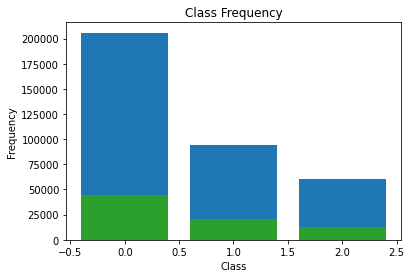

In [3]:
from sklearn.model_selection import train_test_split

firstTime = time.time()
train, valid, test = train_test_valid_split(df, False) # split reviews

train_vectors = train.drop(["Reviewer_Score"], axis=1)
train_labels = train["Reviewer_Score"]

valid_vectors = valid.drop(["Reviewer_Score"], axis=1)
valid_labels = valid["Reviewer_Score"]
print ("Created train and test sets in: %s seconds" % round(time.time()-firstTime,4))

## Naive Bayes implementations

### 1. Gaussian Naive Bayes
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [4]:
from sklearn.naive_bayes import GaussianNB

firstTime = time.time()
model = GaussianNB()
print ("Created model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
model.fit(train_vectors, train_labels)
print ("Fitted model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
y_pred = model.predict(valid_vectors)
print ("Predicted model in: %s seconds" % round(time.time()-firstTime,4))
print("-------------------------------")
print("Accuracy: " + str(accuracy_score(valid_labels, y_pred)))
print("F1 Score: " + str(f1_score(valid_labels, y_pred, average='macro')))

Created model in: 0.0001 seconds
Fitted model in: 3.3372 seconds
Predicted model in: 0.6684 seconds
-------------------------------
Accuracy: 0.5766600741975931
F1 Score: 0.5207219655715932


### 2. Multinominal Naive Bayes
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB

firstTime = time.time()
model = MultinomialNB()
print ("Created model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
model.fit(train_vectors, train_labels)
print ("Fitted model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
y_pred = model.predict(valid_vectors)
print ("Predicted model in: %s seconds" % round(time.time()-firstTime,4))
print("-------------------------------")
print("Accuracy: " + str(accuracy_score(valid_labels, y_pred)))
print("F1 Score: " + str(f1_score(valid_labels, y_pred, average='macro')))

### 3. Complement Naive Bayes
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB

In [0]:
from sklearn.naive_bayes import ComplementNB

firstTime = time.time()
model = ComplementNB()
print ("Created model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
model.fit(train_vectors, train_labels)
print ("Fitted model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
y_pred = model.predict(valid_vectors)
print ("Predicted model in: %s seconds" % round(time.time()-firstTime,4))
print("-------------------------------")
print("Accuracy: " + str(accuracy_score(valid_labels, y_pred)))
print("F1 Score: " + str(f1_score(valid_labels, y_pred, average='macro')))

### 4. Bernoulli Naive Bayes
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [0]:
from sklearn.naive_bayes import BernoulliNB

firstTime = time.time()
model = BernoulliNB()
print ("Created model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
model.fit(train_vectors, train_labels)
print ("Fitted model in: %s seconds" % round(time.time()-firstTime,4))

firstTime = time.time()
y_pred = model.predict(valid_vectors)
print ("Predicted model in: %s seconds" % round(time.time()-firstTime,4))
print("-------------------------------")
print("Accuracy: " + str(accuracy_score(valid_labels, y_pred)))
print("F1 Score: " + str(f1_score(valid_labels, y_pred, average='macro')))

Created model in: 0.0001 seconds
Fitted model in: 1.9914 seconds
Predicted model in: 0.6313 seconds
-------------------------------
Accuracy: 0.3446051628081333
F1 Score: 0.31883325087902764
